In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

In [2]:
from keras.regularizers import l1, l2, l1_l2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend
from keras import optimizers
from keras import layers
from keras.callbacks import LearningRateScheduler

In [4]:
x = np.load('embedded_data.npy')
y= np.load('class_labels.npy')
y0=y1=0
for i in y:
    if i==0:
        y0+=1
    else:
        y1+=1      
print(y0)
print(y1)

MemoryError: Unable to allocate 164. MiB for an array with shape (42896640,) and data type float32

In [4]:
count=1173
for i in range(len(x)):
    if y[i]==1:
        if count!=0:
            y.remove(y[i])
            x.rem

AttributeError: 'numpy.ndarray' object has no attribute 'remove'

In [5]:
x[0].shape

NameError: name 'x' is not defined

In [6]:
epcs = 1000
l_r = 0.025
dec_rate = l_r/epcs
moment = 0.8

In [7]:
# learning rate schedule
def exp_decay(epoch):
    l_rate = l_r*np.exp(-dec_rate*epcs)
    return l_rate
lr_rate = LearningRateScheduler(exp_decay)
cb_list = [lr_rate]

In [8]:
#Choose optimizer:
optim = optimizers.Adam(lr=l_r, decay=dec_rate) 

# create NN for news clissification:
news_DNN = Sequential()

news_DNN.add(Dense(40, input_dim=768, activation = 'relu',kernel_regularizer=l2(0.01)))
news_DNN.add(Dropout(0.1))

news_DNN.add(Dense(40, activation = 'relu',kernel_regularizer=l2(0.01)))
news_DNN.add(Dropout(0.1))


# Output layer with multiclass activation function:
news_DNN.add(Dense(2,activation='softmax'))

# Compile model:
news_DNN.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['acc'])

D:\apps\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

In [10]:
# split into shuffled folds:
#Note that you should edit the class array accordingly: Bias (classes_Bias) or Outlet (classes_All)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3) # chose one split to make analysis faster. change it if required
sc=StandardScaler()

for t, te in sss.split(x, y):
  # Scale the data with StandardScaler before splitting:
    X_train, X_test = sc.fit_transform(x)[t], sc.fit_transform(x)[te]

    y_train, y_test = y[t], y[te]

[X_train_r, y_train_r] = SMOTE().fit_resample(X_train, y_train)
X_train.shape

[X_test_r, y_test_r] = SMOTE().fit_resample(X_test, y_test)

In [11]:
yy=pd.DataFrame(y_train)

In [12]:
yy.value_counts()

1    20170
0    18928
dtype: int64

In [13]:
m_h = news_DNN.fit(X_train, y_train, epochs=epcs, validation_data=(X_test, y_test), batch_size=32, verbose=1, callbacks=cb_list)

Epoch 1/1000
1222/1222 [==============================] - 5s 3ms/step - loss: 0.8357 - acc: 0.5838 - val_loss: 0.7241 - val_acc: 0.5986 - lr: 0.0244
Epoch 2/1000
1222/1222 [==============================] - 4s 3ms/step - loss: 0.7413 - acc: 0.5891 - val_loss: 0.7162 - val_acc: 0.5826 - lr: 0.0244
Epoch 3/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.7157 - acc: 0.5934 - val_loss: 0.7023 - val_acc: 0.5965 - lr: 0.0244
Epoch 4/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.7035 - acc: 0.6067 - val_loss: 0.6878 - val_acc: 0.6228 - lr: 0.0244
Epoch 5/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.7006 - acc: 0.6089 - val_loss: 0.6682 - val_acc: 0.6498 - lr: 0.0244
Epoch 6/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.7027 - acc: 0.6027 - val_loss: 0.6824 - val_acc: 0.6339 - lr: 0.0244
Epoch 7/1000
1222/1222 [==============================] - 4s 3ms/step - loss: 0.6954 - acc: 0.6157 - val_l

Epoch 56/1000
1222/1222 [==============================] - 4s 3ms/step - loss: 0.6505 - acc: 0.6621 - val_loss: 0.6364 - val_acc: 0.6910 - lr: 0.0244
Epoch 57/1000
1222/1222 [==============================] - 4s 3ms/step - loss: 0.6484 - acc: 0.6697 - val_loss: 0.6276 - val_acc: 0.6989 - lr: 0.0244
Epoch 58/1000
1222/1222 [==============================] - 5s 4ms/step - loss: 0.6437 - acc: 0.6710 - val_loss: 0.6467 - val_acc: 0.6729 - lr: 0.0244
Epoch 59/1000
1222/1222 [==============================] - 4s 4ms/step - loss: 0.6452 - acc: 0.6699 - val_loss: 0.6252 - val_acc: 0.6970 - lr: 0.0244
Epoch 60/1000
1222/1222 [==============================] - 4s 3ms/step - loss: 0.6435 - acc: 0.6726 - val_loss: 0.6205 - val_acc: 0.6982 - lr: 0.0244
Epoch 61/1000
1222/1222 [==============================] - 4s 3ms/step - loss: 0.6445 - acc: 0.6693 - val_loss: 0.6335 - val_acc: 0.7028 - lr: 0.0244
Epoch 62/1000
1222/1222 [==============================] - 4s 3ms/step - loss: 0.6429 - acc: 0.6702 

1222/1222 [==============================] - 3s 3ms/step - loss: 0.6037 - acc: 0.7037 - val_loss: 0.5788 - val_acc: 0.7372 - lr: 0.0244
Epoch 165/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.6039 - acc: 0.7048 - val_loss: 0.5652 - val_acc: 0.7519 - lr: 0.0244
Epoch 166/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.6035 - acc: 0.7044 - val_loss: 0.5759 - val_acc: 0.7408 - lr: 0.0244
Epoch 167/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.6051 - acc: 0.7017 - val_loss: 0.5742 - val_acc: 0.7342 - lr: 0.0244
Epoch 168/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.6058 - acc: 0.7019 - val_loss: 0.5774 - val_acc: 0.7408 - lr: 0.0244
Epoch 169/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.6037 - acc: 0.7048 - val_loss: 0.5651 - val_acc: 0.7527 - lr: 0.0244
Epoch 170/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.6025 - acc: 0.7043 - val_lo

1222/1222 [==============================] - 2s 2ms/step - loss: 0.5820 - acc: 0.7187 - val_loss: 0.5530 - val_acc: 0.7492 - lr: 0.0244
Epoch 273/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5835 - acc: 0.7179 - val_loss: 0.5452 - val_acc: 0.7620 - lr: 0.0244
Epoch 274/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5817 - acc: 0.7233 - val_loss: 0.5470 - val_acc: 0.7560 - lr: 0.0244
Epoch 275/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5808 - acc: 0.7200 - val_loss: 0.5373 - val_acc: 0.7670 - lr: 0.0244
Epoch 276/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5807 - acc: 0.7215 - val_loss: 0.5547 - val_acc: 0.7549 - lr: 0.0244
Epoch 277/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5810 - acc: 0.7224 - val_loss: 0.5465 - val_acc: 0.7598 - lr: 0.0244
Epoch 278/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5797 - acc: 0.7222 - val_lo

1222/1222 [==============================] - 3s 2ms/step - loss: 0.5689 - acc: 0.7285 - val_loss: 0.5299 - val_acc: 0.7731 - lr: 0.0244
Epoch 381/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5679 - acc: 0.7299 - val_loss: 0.5261 - val_acc: 0.7746 - lr: 0.0244
Epoch 382/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5699 - acc: 0.7286 - val_loss: 0.5274 - val_acc: 0.7702 - lr: 0.0244
Epoch 383/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5674 - acc: 0.7305 - val_loss: 0.5526 - val_acc: 0.7547 - lr: 0.0244
Epoch 384/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5688 - acc: 0.7288 - val_loss: 0.5306 - val_acc: 0.7752 - lr: 0.0244
Epoch 385/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5653 - acc: 0.7314 - val_loss: 0.5193 - val_acc: 0.7833 - lr: 0.0244
Epoch 386/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5676 - acc: 0.7316 - val_lo

1222/1222 [==============================] - 3s 2ms/step - loss: 0.5564 - acc: 0.7366 - val_loss: 0.5291 - val_acc: 0.7646 - lr: 0.0244
Epoch 489/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5553 - acc: 0.7363 - val_loss: 0.5064 - val_acc: 0.7894 - lr: 0.0244
Epoch 490/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5593 - acc: 0.7335 - val_loss: 0.5093 - val_acc: 0.7858 - lr: 0.0244
Epoch 491/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5596 - acc: 0.7349 - val_loss: 0.5143 - val_acc: 0.7841 - lr: 0.0244
Epoch 492/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5568 - acc: 0.7367 - val_loss: 0.5225 - val_acc: 0.7821 - lr: 0.0244
Epoch 493/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5559 - acc: 0.7369 - val_loss: 0.5118 - val_acc: 0.7827 - lr: 0.0244
Epoch 494/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5590 - acc: 0.7368 - val_lo

1222/1222 [==============================] - 3s 2ms/step - loss: 0.5522 - acc: 0.7383 - val_loss: 0.4999 - val_acc: 0.7970 - lr: 0.0244
Epoch 597/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5499 - acc: 0.7413 - val_loss: 0.5059 - val_acc: 0.7837 - lr: 0.0244
Epoch 598/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5514 - acc: 0.7399 - val_loss: 0.5115 - val_acc: 0.7817 - lr: 0.0244
Epoch 599/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5497 - acc: 0.7396 - val_loss: 0.4997 - val_acc: 0.7893 - lr: 0.0244
Epoch 600/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5497 - acc: 0.7398 - val_loss: 0.5037 - val_acc: 0.7896 - lr: 0.0244
Epoch 601/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5500 - acc: 0.7394 - val_loss: 0.5143 - val_acc: 0.7824 - lr: 0.0244
Epoch 602/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5498 - acc: 0.7401 - val_lo

1222/1222 [==============================] - 2s 2ms/step - loss: 0.5444 - acc: 0.7436 - val_loss: 0.4956 - val_acc: 0.7960 - lr: 0.0244
Epoch 705/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5455 - acc: 0.7427 - val_loss: 0.5008 - val_acc: 0.7871 - lr: 0.0244
Epoch 706/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.5443 - acc: 0.7443 - val_loss: 0.4954 - val_acc: 0.7931 - lr: 0.0244
Epoch 707/1000
1222/1222 [==============================] - 4s 3ms/step - loss: 0.5461 - acc: 0.7411 - val_loss: 0.4950 - val_acc: 0.7928 - lr: 0.0244
Epoch 708/1000
1222/1222 [==============================] - 4s 3ms/step - loss: 0.5446 - acc: 0.7420 - val_loss: 0.5086 - val_acc: 0.7829 - lr: 0.0244
Epoch 709/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5472 - acc: 0.7415 - val_loss: 0.4884 - val_acc: 0.7981 - lr: 0.0244
Epoch 710/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5416 - acc: 0.7435 - val_lo

1222/1222 [==============================] - 2s 2ms/step - loss: 0.5385 - acc: 0.7481 - val_loss: 0.4990 - val_acc: 0.7897 - lr: 0.0244
Epoch 813/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5370 - acc: 0.7488 - val_loss: 0.5070 - val_acc: 0.7836 - lr: 0.0244
Epoch 814/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5408 - acc: 0.7469 - val_loss: 0.4912 - val_acc: 0.7963 - lr: 0.0244
Epoch 815/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5380 - acc: 0.7486 - val_loss: 0.4938 - val_acc: 0.7969 - lr: 0.0244
Epoch 816/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5381 - acc: 0.7461 - val_loss: 0.4911 - val_acc: 0.7933 - lr: 0.0244
Epoch 817/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5414 - acc: 0.7467 - val_loss: 0.4955 - val_acc: 0.7935 - lr: 0.0244
Epoch 818/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5371 - acc: 0.7480 - val_lo

1222/1222 [==============================] - 3s 2ms/step - loss: 0.5338 - acc: 0.7491 - val_loss: 0.4909 - val_acc: 0.7936 - lr: 0.0244
Epoch 921/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5360 - acc: 0.7501 - val_loss: 0.4885 - val_acc: 0.7926 - lr: 0.0244
Epoch 922/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5350 - acc: 0.7479 - val_loss: 0.4902 - val_acc: 0.7991 - lr: 0.0244
Epoch 923/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5354 - acc: 0.7484 - val_loss: 0.4843 - val_acc: 0.7985 - lr: 0.0244
Epoch 924/1000
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5355 - acc: 0.7491 - val_loss: 0.4872 - val_acc: 0.7994 - lr: 0.0244
Epoch 925/1000
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5334 - acc: 0.7518 - val_loss: 0.4848 - val_acc: 0.8005 - lr: 0.0244
Epoch 926/1000
1222/1222 [==============================] - 3s 3ms/step - loss: 0.5357 - acc: 0.7490 - val_lo

In [14]:
pred2 =news_DNN.predict(X_test)

524/524 [==============================] - 1s 909us/step


In [15]:
pred2=np.argmax(news_DNN.predict(X_test), axis=-1)
pred2=list(pred2)
pred2

524/524 [==============================] - 0s 861us/step


[1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,


In [16]:
Y0=Y1=0
for i in pred2:
    if i==1:
        Y0+=1
    else:
        Y1+=1        
print(Y0)
print(Y1)

8620
8137


In [1]:
with sns.color_palette("Accent", n_colors=8):
    plt.figure(figsize=(8,6))
    sns.lineplot(data=np.asarray(m_h.history['acc']))
    sns.lineplot(data=np.asarray(m_h.history['val_acc']))
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy for Media Bias Classification") # change title here
    plt.legend(labels=['training', 'validation'],loc='lower right')
    plt.text(330,0.755,'val Ac = ' + str(round(accuracy_score(y_test,np.argmax(news_DNN.predict(X_test), axis=1)),2))) 

NameError: name 'sns' is not defined

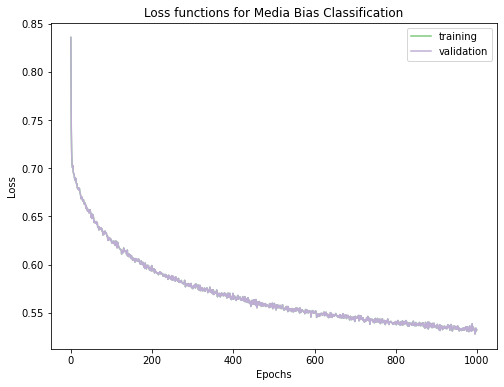

In [18]:
with sns.color_palette("Accent", n_colors=8):
    plt.figure(figsize=(8,6))
    sns.lineplot(data=np.asarray(m_h.history['loss']))
    sns.lineplot(data=np.asarray(m_h.history['loss']))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss functions for Media Bias Classification") #change title here
    plt.legend(labels=['training', 'validation'])


524/524 [==============================] - 0s 864us/step


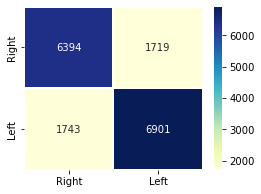

In [19]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, np.argmax(news_DNN.predict(X_test), axis=1)),annot=True,linewidths=2, cmap="YlGnBu",fmt="g", xticklabels=['Right','Left'], yticklabels=['Right','Left']) # Or change labels to ['outlet1','outlet2','outlet3','outlet4'] for outlet classifier
plt.autoscale()

In [20]:
from keras.models import save_model

In [21]:
save_model(news_DNN, r'C:\Users\akkud\Machine Learning Project\DNN_model')

INFO:tensorflow:Assets written to: C:\Users\akkud\Machine Learning Project\DNN_model\assets
